# Bivariate and Multivariate Analysis 

In this section, we will explore the relationships between pairs of variables. This is critical to see correlations and hypothesize causal dependencies. It is unfortunate that our bird strike dataset only captures incidents where bird strikes occurred, and not also flights where bird strikes were avoided. While we could go seek outside data for these uneventful flights and join them to this dataset, we will have to make due without. We will still come across some interesting findings. 

Let's bring in our cleaned dataset once again, and do the appropriate conversions. 

In [3]:
import pandas as pd 

df = pd.read_csv('birdstrike_section2.csv', index_col='INDEX_NR', parse_dates=["INCIDENT_DATE"])

# Turn PHASE_OF_FLIGHT into a category
phase_of_flt = pd.CategoricalDtype(categories=['Parked', 'Taxi','Take-off Run', 'Approach', 'Departure', 'Climb', 'En Route',
                                               'Descent', 'Landing Roll', 'Arrival', 'Local'])

df["PHASE_OF_FLIGHT"] = df["PHASE_OF_FLIGHT"].astype(phase_of_flt)

# Turn TIME into timedelta type 
df["TIME"] = pd.to_timedelta(df["TIME"])

## Comparing Height to Speed

We looked at `HEIGHT` and `SPEED` extensively in the last section, but we did each one separately in a silo. Let's see if there is a relationship between the two and anything interesting. The most informative starting point for this is a scatterplot. 

<Axes: xlabel='HEIGHT', ylabel='SPEED'>

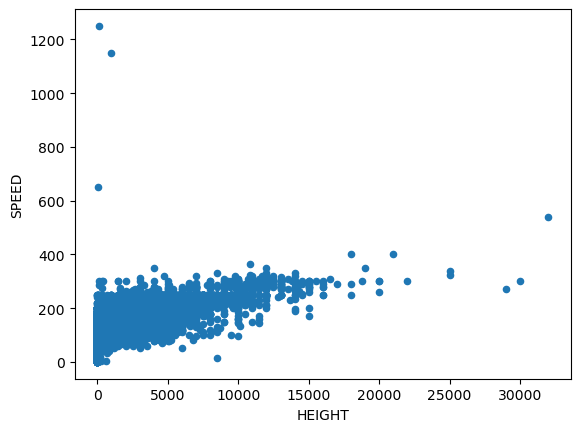

In [6]:
df.plot.scatter(x="HEIGHT",y="SPEED")

Wow, a lot to unpack here already. There does seem to be a linear correlation between `SPEED` and `HEIGHT`. We can quantify this correlation using the [Pearson correlation](https://youtu.be/rijqfllOq6g?si=Ls9OkGqCO6AxnWN2), where a value close to 1 is a strong postive correlation, close to 0 is no correlation, and close to -1 is a strong negative correlation. 

In [8]:
df[["HEIGHT","SPEED"]].corr(method='pearson')

,HEIGHT,SPEED
HEIGHT,1.000000,0.681334
SPEED,0.681334,1.000000


So we get a correlation of `.681334` which is a decent positive correlation. This makes sense because most flights will climb to higher altitudes to get more speed, which at its peak is called cruise altitude. 

But what about those 3 datapoints near 0 feet but were going crazy fast, between 600 and 1200 knots! 1200 knots is about 1.8 mach, so was Maverick buzzing the tower again?

![](https://y.yarn.co/18f66e28-0f40-4db7-b05f-3529759e9708_text.gif)

*Courtesy: Paramount Pictures*

> There was in fact a bird strike scene in the movie Top Gun: Maverick
>
> https://youtu.be/NCrsxRgcC38?si=mdeSiNNYs4iM9dgX

Let's query for those three data points as outliers. 

In [10]:
with pd.option_context('display.max_columns', None):
    display(df[df["SPEED"] > 600])

,Unnamed: 0,OPID,OPERATOR,AIRCRAFT,AC_CLASS,AC_MASS,NUM_ENGS,TYPE_ENG,INCIDENT_DATE,INCIDENT_YEAR,INCIDENT_MONTH,TIME_OF_DAY,TIME,AIRPORT_ID,AIRPORT,STATE,RUNWAY,LOCATION,LATITUDE,LONGITUDE,HEIGHT,SPEED,DISTANCE,PHASE_OF_FLIGHT,DAMAGE_LEVEL,STR_RAD,DAM_RAD,STR_WINDSHLD,DAM_WINDSHLD,STR_NOSE,STR_PROP,DAM_PROP,STR_WING_ROT,DAM_WING_ROT,STR_FUSE,DAM_FUSE,STR_LG,DAM_LG,STR_TAIL,DAM_TAIL,STR_LGHTS,DAM_LGHTS,STR_OTHER,EFFECT,SKY,PRECIPITATION,SPECIES_ID,SPECIES,SIZE,WARNED,COST_REPAIRS,COST_OTHER,COST_REPAIRS_INFL_ADJ,COST_OTHER_INFL_ADJ,NR_INJURIES,NR_FATALITIES,INDICATED_DAMAGE
INDEX_NR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1213519,90951,LXJ,FLEXJET,CL-300,A,3.0,2.0,D,2021-10-09,2021,10,Day,0 days 12:30:00,KILG,NEW CASTLE COUNTY,DE,9,NaN,39.67872,39.67872,100.0,1250.0,1.0,Approach,N,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,NaN,Overcast,NaN,K33,Hawks,Medium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1308645,101500,SWA,SOUTHWEST AIRLINES,B-737-700,A,4.0,2.0,D,2022-08-07,2022,8,Night,0 days 01:00:00,KPIT,PITTSBURGH INTL ARPT,PA,NaN,NaN,40.49147,40.49147,1000.0,1150.0,3.0,Approach,N,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,Some Cloud,NaN,UNKBS,Unknown bird - small,Small,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1431157,117805,BUS,BUSINESS,C-172,A,1.0,1.0,A,2023-01-31,2023,1,Day,NaT,KCCR,BUCHANAN FIELD ARPT,CA,32R,NaN,37.98966,37.98966,30.0,650.0,0.0,Approach,N,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,NaN,No Cloud,NaN,O21,Pigeons,Small,True,NaN,NaN,NaN,NaN,NaN,NaN,False


Okay... I got questions. A Cessna 172 going 650 knots (it's maximum is 163 knots)? And a Boeing 737-700 going 1150 knots at 1000 feet above ground (it's maximum is 473 knots)? And a Flexjet going 1250 knots at 100 feet above the ground? Even Maverick's F-18 can barely reach Mach 1.8, or 1200 knots. These data points have got to have been recorded incorrectly unless we are truly missing something. We should consider removing them if we ever used them for modeling. 

Let's separately compare these two variables to `DISTANCE`. 

<Axes: xlabel='DISTANCE', ylabel='HEIGHT'>

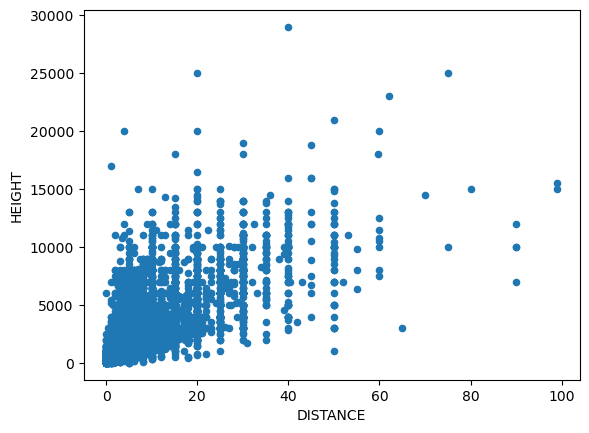

In [12]:
df.plot.scatter(x="DISTANCE",y="HEIGHT")

<Axes: xlabel='DISTANCE', ylabel='SPEED'>

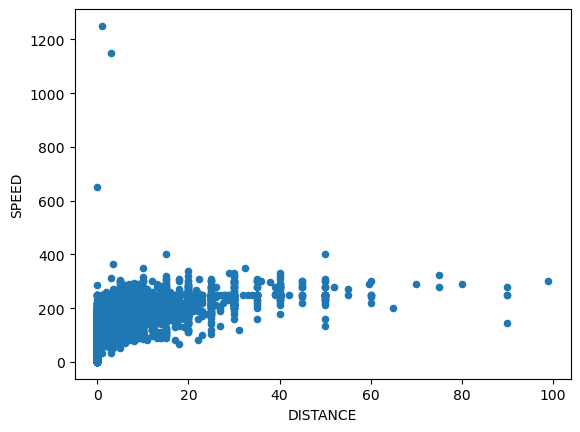

In [14]:
df.plot.scatter(x="DISTANCE",y="SPEED")

Use a pair plot to set each variable against every other variable at once. 

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


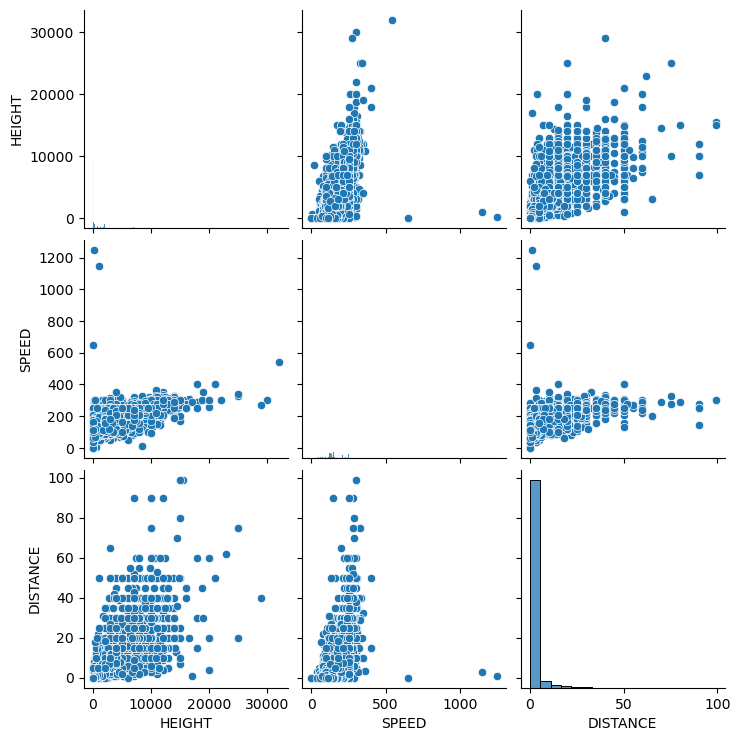

In [16]:
import seaborn as sns

sns.pairplot(df[["HEIGHT","SPEED","DISTANCE"]])

Now let's look at all three of these variables for correlations. We see that `HEIGHT`, `SPEED`, and `DISTANCE` have correlations with each other. There is especially a strong correlation between `HEIGHT` and `DISTANCE` of `.834154`. This makes sense because an airplane is going to be descending as it closes in to land on an airport. 

In [18]:
corr_matrix = df[["HEIGHT","SPEED","DISTANCE"]].corr(method='pearson')
corr_matrix

,HEIGHT,SPEED,DISTANCE
HEIGHT,1.000000,0.681334,0.834154
SPEED,0.681334,1.000000,0.632089
DISTANCE,0.834154,0.632089,1.000000


We can also visualize this using a heatmap. 

<Axes: >

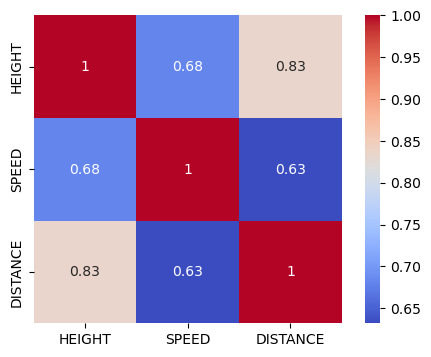

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)

We could try to bring in more variables, or even the entire dataframe. However given that a lot of these variables are discrete and would need to be numerically converted, we won't do that here. But you are welcome to pursue other variables as part of the exercise and use your knowledge to find more correlations. 

What would we use this correlation information for? Well, for example if we were doing machine learning like logistic regression to predict probability of bird strikes, we do not want to include collinear variables that redundantly are correlated to each other. That would overpower the underlying causal variable in the model. We would likely only choose one of these three variables to make a prediction rather than all three, such as `HEIGHT`. 

## A Brief Discussion on Predictor Variables

If we are concerned about bird strikes, it is very unfortunate we only have self-reported data when bird strikes occurred. To see what variables can be used to predict bird strikes, we need data for normal flights where bird strikes did not occur. It is not impossible to get this data but it is beyond the scope of this exercise. However, it still is worth a discussion. 

For example, it is too bad we do not have records for flights without bird strikes and had an alert. We could have taken the "WARNED" variable as shown below, and did some testing to see if the warnings had an effect in preventing bird strikes. But it is hard to make use of this variable because successful warnings that avoided bird strikes were probably not recorded. 

<Axes: xlabel='WARNED'>

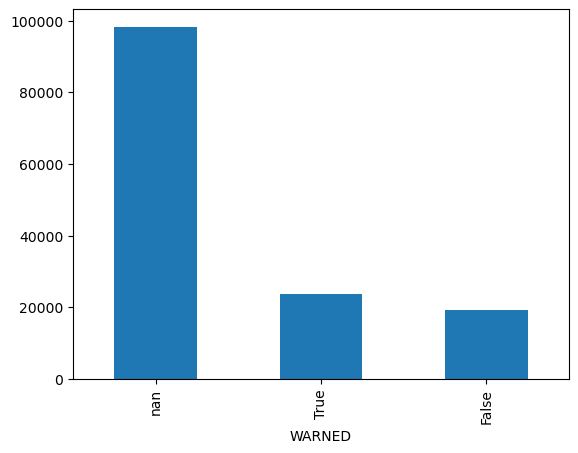

In [24]:
df["WARNED"].value_counts(dropna=False).plot.bar()

If we got access to flight schedules for non-incident data, as well as weather data, we could also see if `PRECIPITATION` increased the per-capita number of incidents when rain occurred. But without that data, it's hard to conclude anything. Yeah, more bird strikes happen with no rain in our data. But if rain is not frequent, that will create less records. That does not mean the rate of incidents will not be higher with rain. 

<Axes: xlabel='PRECIPITATION'>

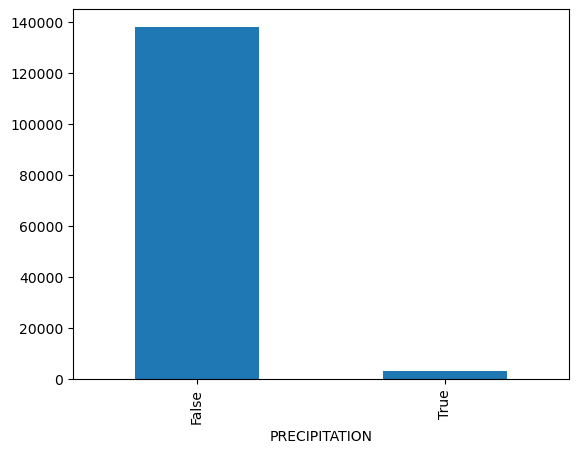

In [26]:
df["PRECIPITATION"].fillna(value="", inplace=False).str.contains("Rain").value_counts().plot.bar()

The bird strike data does not capture this, but the fact is bird strikes do increase AFTER rain because birds like to bathe in puddles on the ground. Poor runoff management on runways can therefore increase bird strikes. This only further shows your data only captures so much of the truth. 

## Multivariate Analysis 

Trying to analyze relationships between three or more variables can be challenging to visualize, but there are ways if you do it thoughtfully. For this exercise, I'm going to assess whether or not a bird strike is more likely to occur on the engine (whether it's a jet engine, propeller, or rotor). 

In hindsight, I realized I have omitted some important columns where a strike, damage, or ingestion have occurred in section 1. But this will be a good exercise in learning to remedy this mistake. Let's bring in this data from the Excel file.

In [28]:
import pandas as pd

engine_cols = ["INDEX_NR", 
"STR_ENG1",
"DAM_ENG1",
"ING_ENG1",
"STR_ENG2",
"DAM_ENG2",
"ING_ENG2",
"STR_ENG3",
"DAM_ENG3",
"ING_ENG3",
"STR_ENG4",
"DAM_ENG4",
"ING_ENG4",
"STR_PROP",
"DAM_PROP",
"STR_WING_ROT",
"DAM_WING_ROT"]

engine_df = pd.read_excel('bird_strike_faa.xlsx', index_col='INDEX_NR', usecols=engine_cols)
engine_df

,STR_ENG1,DAM_ENG1,ING_ENG1,STR_ENG2,DAM_ENG2,ING_ENG2,STR_ENG3,DAM_ENG3,ING_ENG3,STR_ENG4,DAM_ENG4,ING_ENG4,STR_PROP,DAM_PROP,STR_WING_ROT,DAM_WING_ROT
INDEX_NR,,,,,,,,,,,,,,,,
608242,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
608243,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
608244,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
608245,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
608246,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516465,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1516467,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1516468,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


We are going to consolidate all these columns into one by summing them for each respective row. Then we will make this a boolean indicator usign a comparative operation, checking for any values greater than 0 as `True`, and otherwise will be `False`. 

In [30]:
engine_df_ind = engine_df.sum(axis=1) > 0 
engine_df_ind

INDEX_NR
608242     False
608243      True
608244      True
608245     False
608246      True
           ...  
1516465    False
1516467    False
1516468     True
1516469    False
1516470    False
Length: 298201, dtype: bool

Let's perform a left-join to our dataframe, meaning we will only keep records in our `df` of 2015 onwards data, and only include `ENGINE_STRIKE_IND` data that have indices in common. 

In [32]:
df = df.join(engine_df_ind.rename("ENGINE_STRIKE_IND"), how='left')

with pd.option_context('display.max_columns', None):
    display(df)

,Unnamed: 0,OPID,OPERATOR,AIRCRAFT,AC_CLASS,AC_MASS,NUM_ENGS,TYPE_ENG,INCIDENT_DATE,INCIDENT_YEAR,INCIDENT_MONTH,TIME_OF_DAY,TIME,AIRPORT_ID,AIRPORT,STATE,RUNWAY,LOCATION,LATITUDE,LONGITUDE,HEIGHT,SPEED,DISTANCE,PHASE_OF_FLIGHT,DAMAGE_LEVEL,STR_RAD,DAM_RAD,STR_WINDSHLD,DAM_WINDSHLD,STR_NOSE,STR_PROP,DAM_PROP,STR_WING_ROT,DAM_WING_ROT,STR_FUSE,DAM_FUSE,STR_LG,DAM_LG,STR_TAIL,DAM_TAIL,STR_LGHTS,DAM_LGHTS,STR_OTHER,EFFECT,SKY,PRECIPITATION,SPECIES_ID,SPECIES,SIZE,WARNED,COST_REPAIRS,COST_OTHER,COST_REPAIRS_INFL_ADJ,COST_OTHER_INFL_ADJ,NR_INJURIES,NR_FATALITIES,INDICATED_DAMAGE,ENGINE_STRIKE_IND
INDEX_NR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
708307,0,BUS,BUSINESS,PA-28,A,1.0,1.0,A,2015-05-22,2015,5,NaN,NaT,KVRB,VERO BEACH MUNICIPAL,FL,4,NaN,27.655560,27.655560,NaN,NaN,NaN,Approach,M,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,UNKB,Unknown bird,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True
708308,1,BUS,BUSINESS,BE-1900,A,3.0,2.0,C,2015-06-18,2015,6,NaN,NaT,PAEN,KENAI MUNICIPAL ARPT,AK,NaN,NaN,60.572000,60.572000,NaN,NaN,NaN,Approach,M,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,NaN,NaN,NaN,UNKB,Unknown bird,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False
708309,2,BUS,BUSINESS,PA-46 MALIBU,A,1.0,1.0,A,2015-09-20,2015,9,NaN,NaT,KDWH,DAVID WAYNE HOOKS MEMORIAL ARPT,TX,NaN,NaN,30.061860,30.061860,NaN,NaN,NaN,NaN,M,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,UNKB,Unknown bird,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True
708310,3,DAL,DELTA AIR LINES,B-717-200,A,4.0,2.0,D,2015-11-07,2015,11,NaN,NaT,KSTL,LAMBERT-ST LOUIS INTL,MO,30R,NaN,38.747690,38.747690,NaN,NaN,2.0,Approach,M,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,NaN,NaN,NaN,UNKB,Unknown bird,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True
708311,4,BUS,BUSINESS,BE-90 KING,A,2.0,2.0,C,2015-12-17,2015,12,NaN,NaT,KPMP,POMPANO BEACH AIRPARK,FL,15,NaN,26.247140,26.247140,0.0,NaN,0.0,Landing Roll,M,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,NaN,NaN,NaN,UNKB,Unknown bird,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516465,141064,UNK,UNKNOWN,UNKNOWN,NaN,NaN,NaN,NaN,2024-03-17,2024,3,NaN,0 days 07:15:00,KSEA,SEATTLE-TACOMA INTL,WA,16L,NaN,47.448980,47.448980,NaN,NaN,0.0,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,Z6007,American robin,Small,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False
1516467,141065,EJA,NETJETS,CL-601/604,A,3.0,2.0,D,2024-03-17,2024,3,NaN,0 days 19:15:00,KHYI,SAN MARCOS MUNICIPAL ARPT,TX,8,NaN,29.893610,29.893610,2000.0,160.0,5.0,Approach,N,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,NaN,Some Cloud,NaN,ZT000,Meadowlarks,Small,False,NaN,NaN,NaN,NaN,NaN,NaN,False,False
1516468,141066,ASA,ALASKA AIRLINES,B-737-800,A,4.0,2.0,D,2024-03-17,2024,3,Day,0 days 16:39:00,KSBA,SANTA BARBARA MUNICIPAL,CA,NaN,NaN,34.426210,34.426210,30.0,NaN,0.0,Approach,N,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,No Cloud,NaN,ZT002,Western meadowlark,Small,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True


Now how many strikes since 2015 were engine related? We find it is over 20% of the strikes. 

In [34]:
df["ENGINE_STRIKE_IND"].value_counts()

ENGINE_STRIKE_IND
False    115793
True      25276
Name: count, dtype: int64

When it comes to multivariable analysis, we can get really crazy and we have to structure our hypotheses carefully. After all, trying to find the relationship between more than 2 variables can be quite tricky, and it's easy to get lost in the noise. 

For our purposes, let's say we are interested in understanding how aircraft mass, height, a plays a role in whether or not a bird strike is engine-related across different heights. Sounds like a mouthful, right? As the Dread Pirate Roberts said in *The Princess Bride*, "Truly you have a dizzying intellect." 

> The `AC_MASS` column can be interpreted as follows: 1 = 2,250 kg or less: 2 = 2,251-5,700 kg: 3 = 5,701-27,000 kg: 4 = 27,001-272,000 kg: 5 = above 272,000 kg

But when we involve many variables like this, the secret is to isolate to just one value (such as each aircraft mass) at a time, then observe another variable in that context, and then finally another. Below, we will create a violin plot which helps us visualize the distribution of bird strikes, and for when engine strikes occurred versus not occurred. They also can contain box-and-whisker plots. 

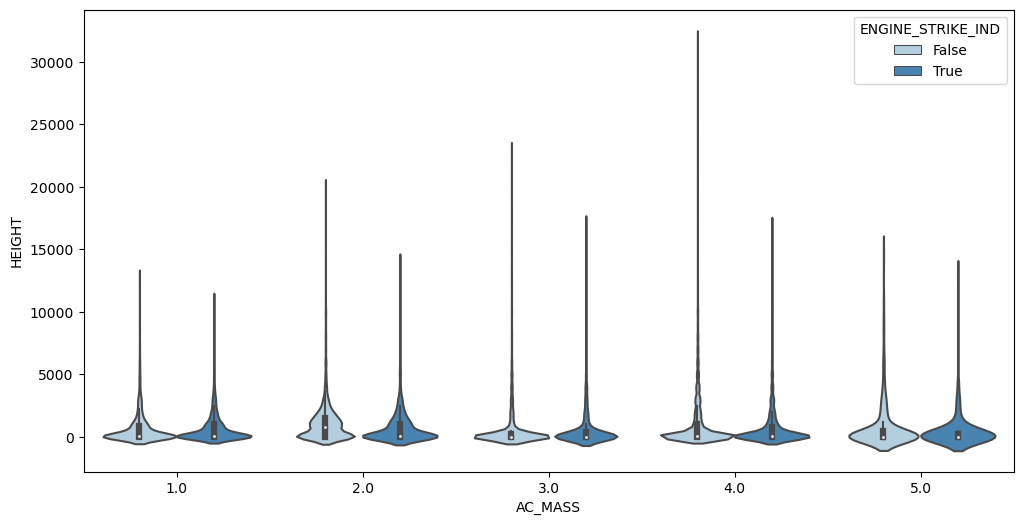

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns 

plt.figure(figsize=(12, 6))
sns.violinplot(x='AC_MASS', y='HEIGHT', data=df, hue='ENGINE_STRIKE_IND', palette='Blues', legend=True)
plt.show()


Alright, so our hypothesis did not reveal anything too interesting at least from this angle. It seems that setting aircraft mass against height, and comparing the distributions for engine-related versus non-engine related strikes did not yield anything too interesting. The distributions roughly look the same and strikes again happen heavily on the ground. 

Let's turn our attention to cost. What are the cost to repairs adjusted for inflation, for each aircraft mass, for both engine and non-engine related strikes? 

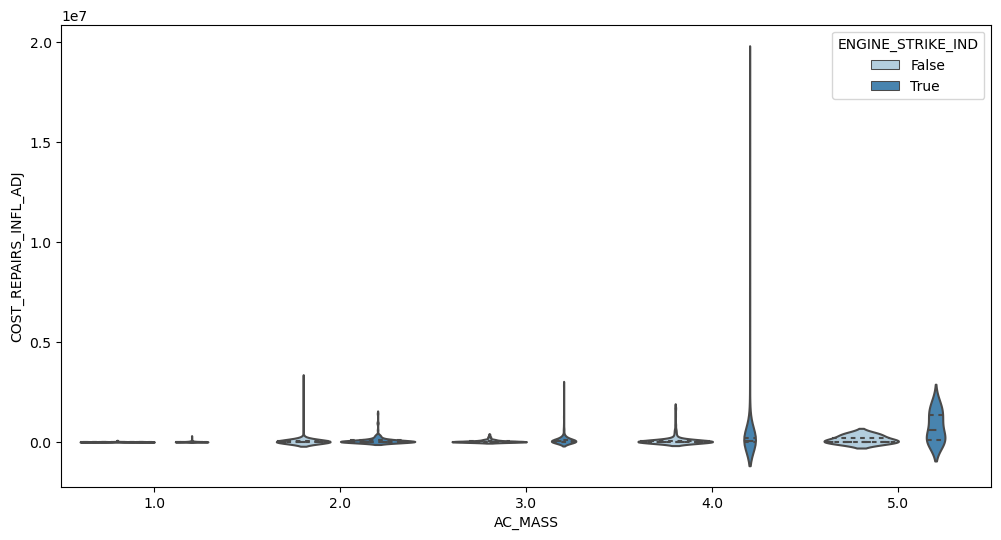

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns 

plt.figure(figsize=(12, 6))

sns.violinplot(x='AC_MASS', 
               y='COST_REPAIRS_INFL_ADJ', data=df, 
               hue='ENGINE_STRIKE_IND', 
               palette='Blues', 
               inner='quartile', 
               legend=True)
plt.show()


While our violin plots are a bit thin due to the few records that have documented costs, we can see that aircraft with a mass of 4.0 ( 27,001-272,000 kg) are particularly prone to higher costs for engine-related strikes. Engine-related strikes are in general more likely to have more costs for `AC_MASS` values of 3 or more. 

Let's also count "other" costs that are related to loss of revenue, hotels for passengers due to grounded flights, cost of fuel dumps, and other non-damage related costs to the operator.  

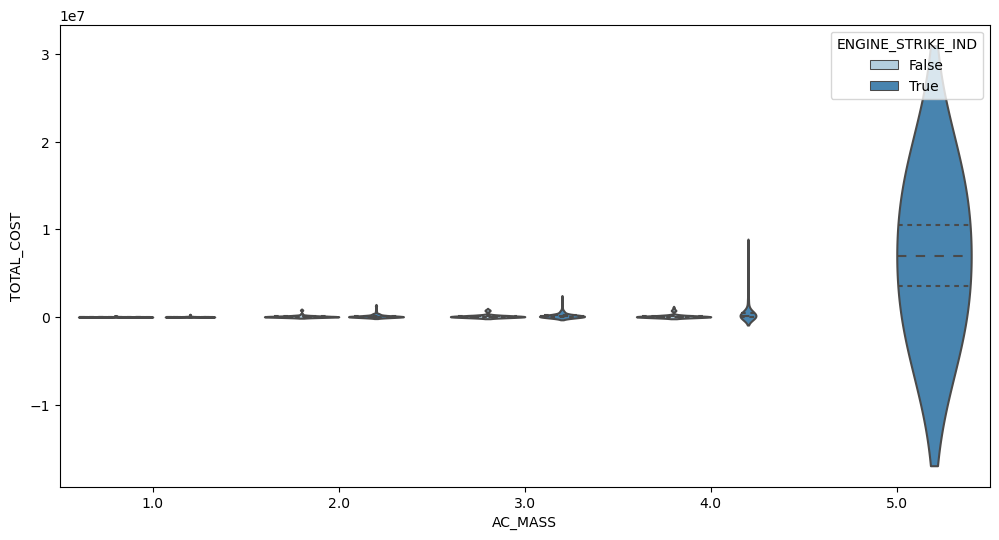

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns 

plt.figure(figsize=(12, 6))
df["TOTAL_COST"] = df["COST_REPAIRS_INFL_ADJ"] + df["COST_OTHER_INFL_ADJ"]

sns.violinplot(x='AC_MASS', 
               y='TOTAL_COST', data=df, 
               hue='ENGINE_STRIKE_IND', 
               palette='Blues', 
               inner='quartile', 
               legend=True)
plt.show()


We see increasing amounts of costs related to engine strikes at a mass of 4, and this greatly increases at 5. This makes sense because big aircraft carry a lot of inconvenienced passengers, and they also likely have the most expensive engines needing replacement. It's also interesting to note that huge aircraft have negligible costs related to non-engine strikes. 

## Exercise

Could `SPEED` be a driving variable for `COST_REPAIRS_INFL_ADJ`? Do some analysis below and state your conclusion. 

In [ ]:
# PUT CODE HERE, USE MORE CELLS IF NEEDED


### SCROLL DOWN FOR ANSWER
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
v 

There is no correlation between speed and cost of repairs for the bird strike records. The scatterplot and correlation coefficient indicate no relationship. 

<Axes: xlabel='SPEED', ylabel='COST_REPAIRS_INFL_ADJ'>

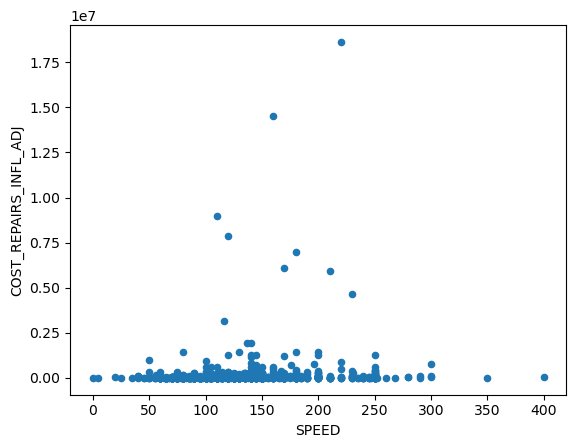

In [44]:
df.plot.scatter(x="SPEED",y="COST_REPAIRS_INFL_ADJ")

In [46]:
df[["SPEED","COST_REPAIRS_INFL_ADJ"]].corr(method='pearson')

,SPEED,COST_REPAIRS_INFL_ADJ
SPEED,1.000000,0.092716
COST_REPAIRS_INFL_ADJ,0.092716,1.000000
